In [66]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import seaborn as sns
import random
import IPython.display

In [51]:
audios = []
labels = []
audio_files = os.listdir('Crema')
for file in audio_files:
    labels.append(file.split('_')[2])
    fs,data = wavfile.read(os.path.join('Crema',file))
    audios.append([data,fs])
    
    

In [52]:
print(len(labels))
print(len(audios))

7442
7442


In [53]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [54]:
fs_list = [x for _,x in audios]
set(fs_list) # all files have a sample rate of 16kHz

{16000}

,data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",ANG
1,"[[30, 43, 52, 59, 77, 87, 108, 115, 152, 149, ...",DIS
2,"[[263, 277, 274, 244, 240, 220, 195, 191, 161,...",FEA
3,"[[-142, -107, -99, -88, -94, -53, -63, -40, -2...",HAP
4,"[[79, 45, 43, 19, -22, -65, -92, -101, -144, -...",NEU
...,...,...
7437,"[[30, 46, 45, 48, 34, 38, 34, 32, 9, 26, 27, 2...",DIS
7438,"[[-228, -222, -236, -251, -236, -249, -254, -2...",FEA
7439,"[[-74, -61, -76, -71, -67, -56, -74, -66, -73,...",HAP
7440,"[[-53, -35, -25, -19, -3, 8, 19, 20, 24, 61, 6...",NEU


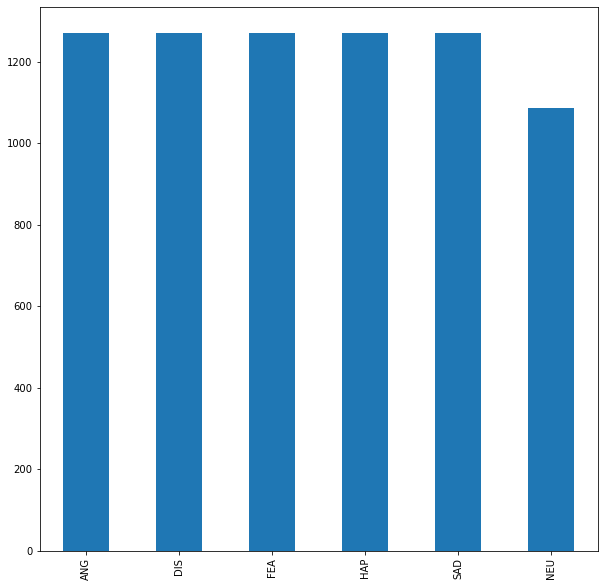

In [55]:
df = pd.concat([pd.Series(audios,name='data'),pd.Series(labels,name='label')],axis=1)
df['label'].value_counts().plot(kind='bar',figsize=(10,10))
df

In [100]:
emotions = {'ANG':'Angry','SAD':'Sad','NEU':'Neutral','HAP':'Happy','FEA':'Fear','DIS':'Disgust'}
def load_audio(df,emotion):

    audios = list(df[df['label'] == emotion]['data'])
    idx = random.randint(0,len(audios)-1) # choosing a random file of that emotion
    audio = audios[idx][0]
    fs = audios[idx][1]
    duration = len(audio)/fs

    time = np.arange(0,duration,1/fs) # time vector

    plt.figure(figsize=(16,8))
    plt.plot(time,audio)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(emotions[emotion] + ' Waveform')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()
    return audio, fs

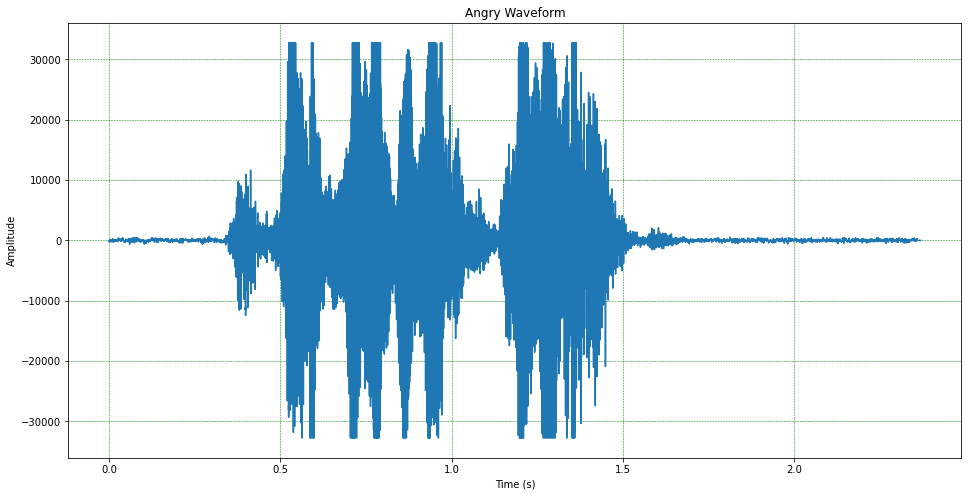

In [102]:
# ANGRY
audio,fs = load_audio(df,'ANG')
IPython.display.Audio(audio,rate=fs)


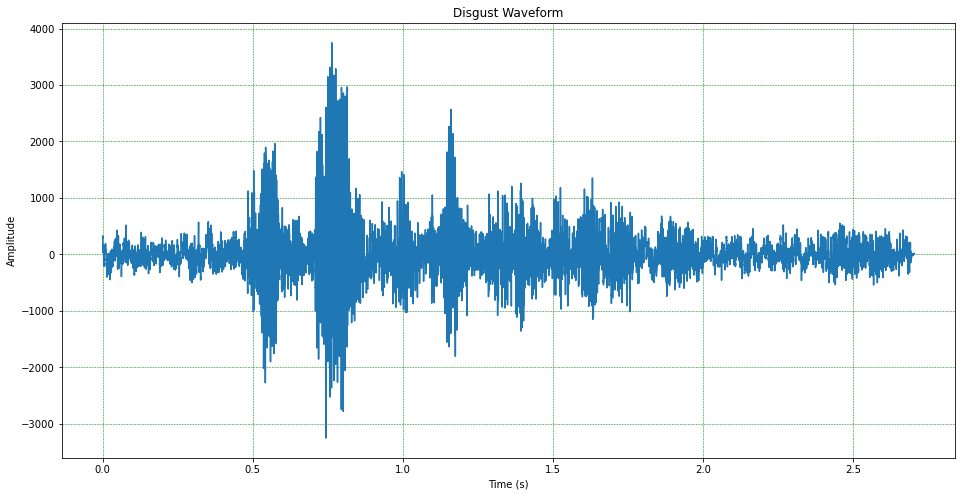

In [103]:
# DISGUSTED 
audio,fs = load_audio(df,'DIS')
IPython.display.Audio(audio,rate=fs)

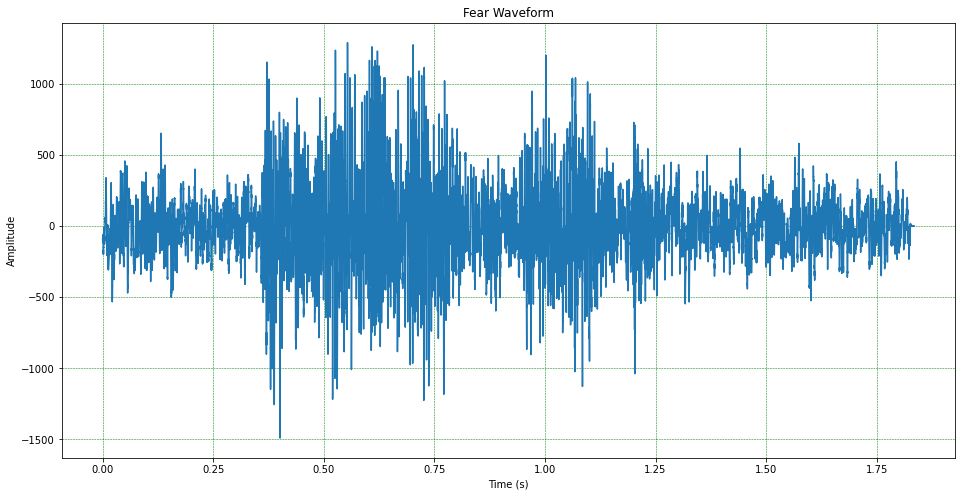

In [108]:
# FEAR
audio,fs = load_audio(df,'FEA')
IPython.display.Audio(audio,rate=fs)

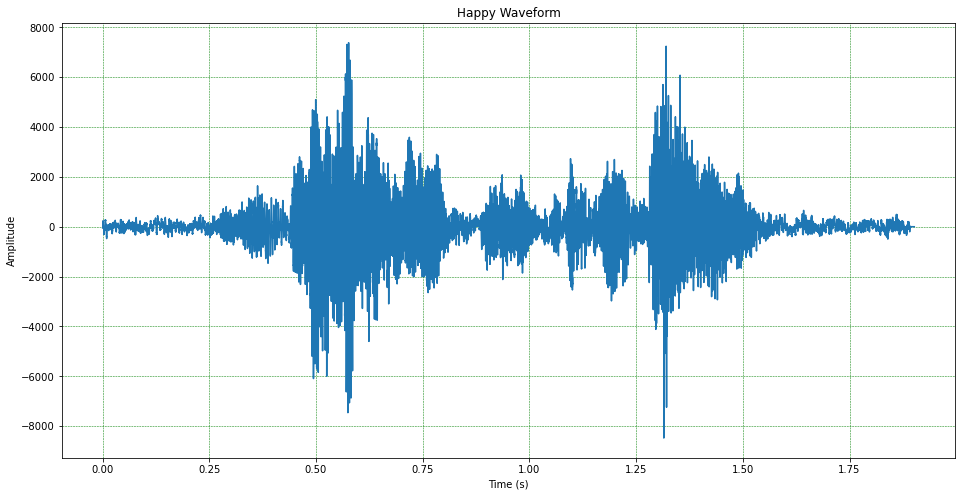

In [112]:
# HAPPY
audio,fs = load_audio(df,'HAP')
IPython.display.Audio(audio,rate=fs)

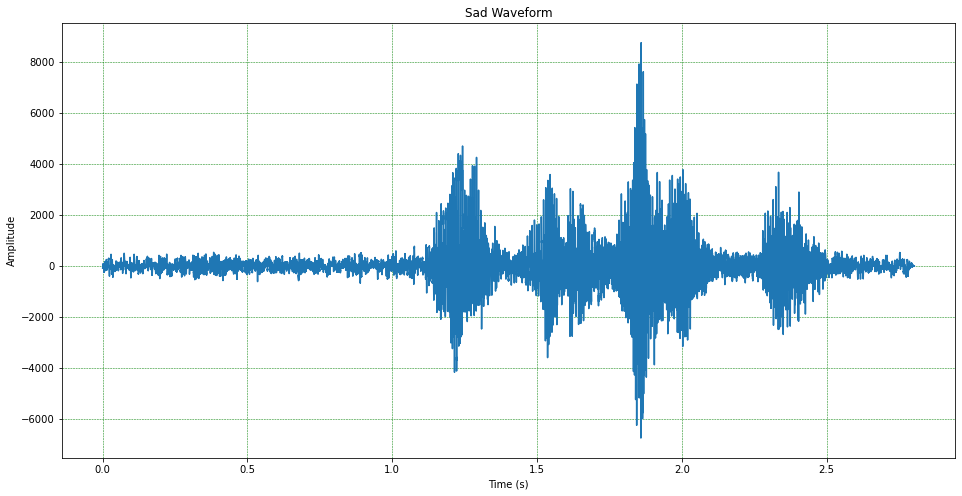

In [113]:
# SAD
audio,fs = load_audio(df,'SAD')
IPython.display.Audio(audio,rate=fs)

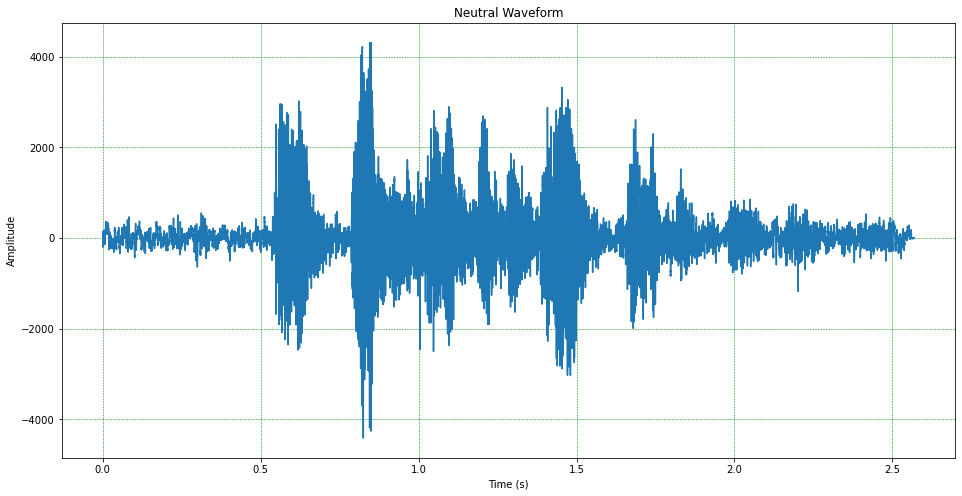

In [114]:
# NEUTRAL
audio,fs = load_audio(df,'NEU')
IPython.display.Audio(audio,rate=fs)